<a href="https://colab.research.google.com/github/rivaldilambey22/rivaldilambey22/blob/main/Model_ANN_Classification_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*Social Computing Big Data Laboratory - 2023*

----

##Artificial Neural Network

Artificial neural networks (ANN) or connectionist systems are computing systems that are inspired by, but not necessarily identical to, the biological neural networks that constitute animal brains. [*WIkipedia*](https://en.wikipedia.org/wiki/Artificial_neural_network).

In this practice, we will keep working on the Telco Cutomer Churn Dataset.



### Import Package

Pertama-tama, kita melakukan import package seperti biasa

In [1]:
# Import Library
import pandas as pd

#Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Split Data
from sklearn.model_selection import train_test_split, cross_val_score

# Import Library
from sklearn.neural_network import MLPClassifier

### Exploration Data

In [2]:
#Import Dataset
from google.colab import files
uploaded = files.upload()

Saving Churn_Transformed.csv to Churn_Transformed.csv


In [3]:
df_customer= pd.read_csv('Churn_Transformed.csv', sep=',',)

In [4]:
# Show 10 first Row
df_customer.head(10)

,Unnamed: 0,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,...,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,1,1,...,0,1,0,1,0,0,1,2985,2985.0,0
1,1,1,0,0,1,1,0,0,1,34,...,1,0,1,0,0,1,0,5695,18895.0,0
2,2,1,0,0,1,1,0,0,1,2,...,0,1,0,1,0,1,0,5385,10815.0,1
3,3,1,0,0,1,1,0,0,1,45,...,1,0,1,0,0,1,1,423,184075.0,0
4,4,0,1,0,1,1,0,0,1,2,...,0,1,0,1,0,0,1,707,15165.0,1
5,5,0,1,0,1,1,0,0,1,8,...,0,1,0,1,0,0,1,9965,8205.0,1
6,6,1,0,0,1,1,0,1,0,22,...,0,1,0,1,1,0,0,891,19494.0,0
7,7,0,1,0,1,1,0,0,1,10,...,0,1,1,0,0,1,0,2975,3019.0,0
8,8,0,1,0,1,0,1,0,1,28,...,0,1,0,1,0,0,1,1048,304605.0,1
9,9,1,0,0,1,1,0,1,0,62,...,1,0,1,0,0,1,1,5615,348795.0,0


there is an Unnamed column, we have to remove it.

In [5]:
# Remove "Unnamed:O" Column
df_cust1 = df_customer.drop("Unnamed: 0", axis=1)
df_cust1

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,1,1,0,...,0,1,0,1,0,0,1,2985,2985.0,0
1,1,0,0,1,1,0,0,1,34,1,...,1,0,1,0,0,1,0,5695,18895.0,0
2,1,0,0,1,1,0,0,1,2,1,...,0,1,0,1,0,1,0,5385,10815.0,1
3,1,0,0,1,1,0,0,1,45,0,...,1,0,1,0,0,1,1,423,184075.0,0
4,0,1,0,1,1,0,0,1,2,1,...,0,1,0,1,0,0,1,707,15165.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,0,1,1,0,24,1,...,1,0,0,1,0,1,0,848,19905.0,0
7039,0,1,0,1,0,1,1,0,72,1,...,1,0,0,1,1,0,0,1032,73629.0,0
7040,0,1,0,1,0,1,1,0,11,0,...,0,1,0,1,0,0,1,296,34645.0,0
7041,1,0,1,0,0,1,0,1,4,1,...,0,1,0,1,0,1,0,744,3066.0,1


In [ ]:
# Remove "Gender" Column *Khusus Dataset_ANN (Tugas)*
df_cust1 = df_customer.drop("Gender", axis=1)
df_cust1.head(10)

KeyError: ignored

In [6]:
# Check the Data Infomation
df_cust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender_0            7043 non-null   int64  
 1   gender_1            7043 non-null   int64  
 2   SeniorCitizen_0     7043 non-null   int64  
 3   SeniorCitizen_1     7043 non-null   int64  
 4   Partner_0           7043 non-null   int64  
 5   Partner_1           7043 non-null   int64  
 6   Dependents_0        7043 non-null   int64  
 7   Dependents_1        7043 non-null   int64  
 8   tenure              7043 non-null   int64  
 9   PhoneService_0      7043 non-null   int64  
 10  PhoneService_1      7043 non-null   int64  
 11  MultipleLines_0     7043 non-null   int64  
 12  MultipleLines_1     7043 non-null   int64  
 13  MultipleLines_2     7043 non-null   int64  
 14  InternetService_0   7043 non-null   int64  
 15  InternetService_1   7043 non-null   int64  
 16  Intern

### Create Model Artificial Neural Network

In [7]:
#Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
# Merubah 'Churn' menjadi 'Exited'
mm_scaler = MinMaxScaler()
column_names = df_cust1.columns.tolist()
column_names.remove('Churn')


# Transform all attributes
df_cust1[column_names] = mm_scaler.fit_transform(df_cust1[column_names])
df_cust1.sort_index(inplace=True)
df_cust1.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.013889,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.250169,0.003420,0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.472222,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.478745,0.021766,0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.452598,0.012449,1
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.625000,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.034076,0.212235,0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.058030,0.017465,1


In [8]:
# Selecting the Feature, by remove the unused feature
feature = ['Churn']
train_feature = df_cust1.drop(feature, axis=1)

# Merubah 'Churn' menjadi 'Exited'

# Set The Target
train_target = df_cust1["Churn"]

In [9]:
# Show the Feature
train_feature.head(10)

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.013889,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.250169,0.003420
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.472222,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.478745,0.021766
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.452598,0.012449
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.625000,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.034076,0.212235
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.058030,0.017465
5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.111111,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.838900,0.009439
6,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.305556,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.073549,0.022457
7,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.138889,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.249325,0.003459
8,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.388889,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.086791,0.351219
9,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.861111,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.471997,0.402174


In [11]:
# Show the Target
train_target.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [12]:
#Split Data 70:30
X_train, X_test, y_train, y_test = train_test_split(train_feature ,train_target, shuffle = True, test_size=0.3, random_state=1)

In [13]:
# Show the training data
X_train.head(10)

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges
5925,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.277778,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.056343,0.016308
4395,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.958333,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.875169,0.085848
1579,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.676957,0.010935
1040,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.194444,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.761302,0.014578
1074,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.013889,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.016194,0.000221
2479,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.777778,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.638158,0.049114
6908,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.125000,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.465250,0.051839
3888,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.013889,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.674426,0.009220
3157,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.125000,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.377530,0.000475
4691,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.777778,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.847335,0.655868


In [14]:
X_train

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges
5925,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.277778,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.056343,0.016308
4395,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.958333,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.875169,0.085848
1579,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.676957,0.010935
1040,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.194444,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.761302,0.014578
1074,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.013889,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.016194,0.000221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.125000,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.083165,0.010570
5192,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.833333,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.166667,0.013699
3980,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.388889,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.087551,0.034335
235,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.044281,0.001294


In [15]:
y_train.head(10)

5925    0
4395    1
1579    1
1040    1
1074    0
2479    0
6908    1
3888    1
3157    1
4691    1
Name: Churn, dtype: int64

In [16]:
X_test

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges
3381,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.569444,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.671896,0.382894
6180,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.916667,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.084767,0.746248
4829,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.002193,0.060441
3737,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.069444,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.041076,0.028800
4249,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.138889,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.053981,0.076089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.138889,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.337888,0.047422
1351,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.152778,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.170884,0.002870
2048,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.291667,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.080044,0.023390
6218,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.972222,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.047655,0.474266


In [17]:
y_test.head(10)

3381    0
6180    0
4829    0
3737    1
4249    0
6835    0
3869    0
3943    0
3491    0
6847    0
Name: Churn, dtype: int64

To train the ANN Model.We will use the MLPClassifier from Scikit Learn Library. The full documentation can be seen [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). Below is the default parameter:

`sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)`

In [18]:
# Fitting Model
mlp = MLPClassifier(hidden_layer_sizes=(5),
                    activation = 'relu',
                    solver = 'adam',
                    max_iter= 10000,
                    verbose = True,
                    random_state=1)
mlp = mlp.fit(X_train,y_train)

# Prediction to Test Dataset
y_predmlp = mlp.predict(X_test)

Iteration 1, loss = 0.77336332
Iteration 2, loss = 0.66423037
Iteration 3, loss = 0.58864615
Iteration 4, loss = 0.55663533
Iteration 5, loss = 0.54341773
Iteration 6, loss = 0.53172897
Iteration 7, loss = 0.52018350
Iteration 8, loss = 0.50896731
Iteration 9, loss = 0.49834399
Iteration 10, loss = 0.48793057
Iteration 11, loss = 0.47882895
Iteration 12, loss = 0.47122653
Iteration 13, loss = 0.46515437
Iteration 14, loss = 0.46048155
Iteration 15, loss = 0.45689087
Iteration 16, loss = 0.45408281
Iteration 17, loss = 0.45182967
Iteration 18, loss = 0.44947814
Iteration 19, loss = 0.44769687
Iteration 20, loss = 0.44611892
Iteration 21, loss = 0.44471826
Iteration 22, loss = 0.44355032
Iteration 23, loss = 0.44249098
Iteration 24, loss = 0.44117077
Iteration 25, loss = 0.44022883
Iteration 26, loss = 0.43957371
Iteration 27, loss = 0.43844515
Iteration 28, loss = 0.43751387
Iteration 29, loss = 0.43678792
Iteration 30, loss = 0.43600278
Iteration 31, loss = 0.43549342
Iteration 32, los

In [19]:
print('Number of Layer =', mlp.n_layers_)
print('Number of Iteration =', mlp.n_iter_)
print('Current loss computed with the loss function =', mlp.loss_)

Number of Layer = 3
Number of Iteration = 225
Current loss computed with the loss function = 0.4169070726324682


### Create Confussion Matrix

Since it was the classification problem, we can evaluate the model using Confussion Matrix

In [20]:
# Import the metrics class
from sklearn import metrics
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

In [21]:
#Confussion Matrix
cnf_matrixmlp = metrics.confusion_matrix(y_test, y_predmlp)
list1 = ["Actual Churn", "Actual NoChurn"]
list2 = ["Predicted Churn", "Predicted NoChurn"]
pd.DataFrame(cnf_matrixmlp, list1,list2)

#Pada Dataset_ANN Rubah list 1 menjadi "Actual Exited dst"
#List 2 menjadi "Predicted Exited"

,Predicted Churn,Predicted NoChurn
Actual Churn,1393,192
Actual NoChurn,215,313


In [22]:
! pip install scikit-plot

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

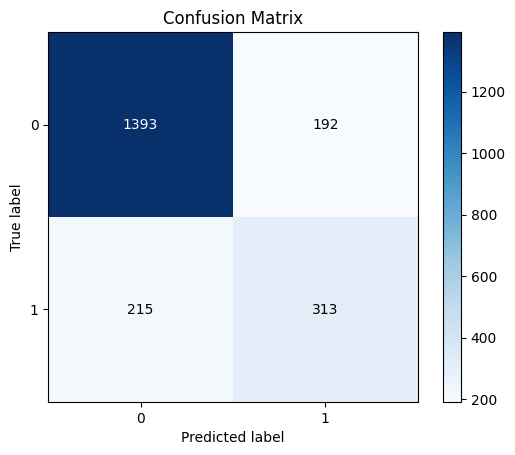

In [23]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predmlp)


*   TN (0,0) = 1393
*   FP (1,0) = 192
*   FN (0,1) = 215
*   TP (1,1) = 313








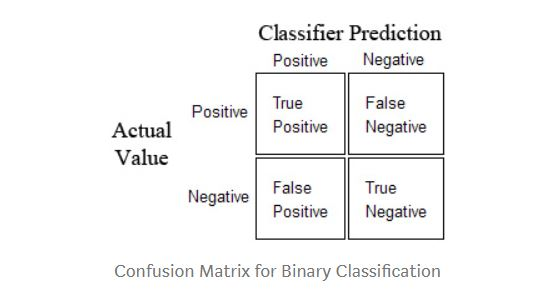



* True Positive (TP): Outcome where the model correctly predicts the positive class.
* True Negative (TN): Outcome where the model correctly predicts the negative class.
* False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.
* False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.

In [24]:
# Show the Accuracy, Precision, Recall, F1, etc.
acc_mlp = metrics.accuracy_score(y_test, y_predmlp)
prec_mlp = metrics.precision_score(y_test, y_predmlp)
rec_mlp = metrics.recall_score(y_test, y_predmlp)
f1_mlp = metrics.f1_score(y_test, y_predmlp)
kappa_mlp = metrics.cohen_kappa_score(y_test, y_predmlp)

print("Accuracy:", acc_mlp)
print("Precision:", prec_mlp)
print("Recall:", rec_mlp)
print("F1 Score:", f1_mlp)
print("Cohens Kappa Score:", kappa_mlp)

Accuracy: 0.807382867960246
Precision: 0.6198019801980198
Recall: 0.5928030303030303
F1 Score: 0.606001936108422
Cohens Kappa Score: 0.4786192237529018
